# Customer Segmentation in Insurance Using Unsupervised Learning

## Problem Statement

In the insurance sector, understanding customer behaviors and segmenting them into meaningful groups is essential for tailored marketing strategies, personalized offerings, and optimizing resource allocation. However, the dataset lacks predefined labels, making this an **unsupervised learning problem**. By applying clustering techniques and dimensionality reduction, this project aims to uncover hidden patterns and structure within customer data.

## Dataset Description

The dataset used for this project, **"Market Segmentation in Insurance (Unsupervised)"**, was sourced from Kaggle (JillaniSoftTech, 2022). It includes financial metrics such as spending patterns, credit limits, and payment behaviors, enabling a comprehensive analysis of customer characteristics. 

Key features in the dataset include:
- **BALANCE**: The customer's outstanding balance.
- **PURCHASES**: Total purchases made by the customer.
- **CREDIT_LIMIT**: The credit limit assigned to the customer.
- **MINIMUM_PAYMENTS**: Minimum amount payments recorded for the customer.
- **CASH_ADVANCE**: Total cash advances taken by the customer.

This dataset is well-suited for identifying customer segments that can help insurance companies refine their offerings.

## Objectives

The primary objectives of this project are:
1. **Explore and clean the dataset**: Perform Exploratory Data Analysis (EDA) to identify missing values, outliers, and data patterns.
2. **Apply dimensionality reduction**: Use Principal Component Analysis (PCA) to reduce noise and simplify clustering.
3. **Perform clustering analysis**: Evaluate multiple clustering algorithms (e.g., KMeans, DBSCAN, Gaussian Mixture) to segment customers.
4. **Interpret results**: Provide actionable insights on customer segments for the insurance domain.

## Methods and Tools

This project employs the following methods and tools:
- **EDA**: Visualizations and statistical analysis using Python libraries like `seaborn` and `matplotlib`.
- **PCA**: Dimensionality reduction using `sklearn` to retain 90% variance.
- **Clustering Algorithms**: KMeans, DBSCAN, Agglomerative Clustering, Spectral Clustering, and Gaussian Mixture Models.
- **Validation Metrics**: Silhouette Scores to evaluate clustering performance.

## Citation

JillaniSoftTech. (2022). *Market Segmentation in Insurance (Unsupervised)* [Dataset]. Kaggle. Retrieved from [https://www.kaggle.com/jillanisofttech/market-segmentation-in-insurance-unsupervised](https://www.kaggle.com/jillanisofttech/market-segmentation-in-insurance-unsupervised)



In [ ]:
# Import libraries

import kagglehub as kh
import numpy as np

In [60]:
# Download latest version
path = kh.dataset_download("jillanisofttech/market-segmentation-in-insurance-unsupervised")
print(path)

C:\Users\fvoge\.cache\kagglehub\datasets\jillanisofttech\market-segmentation-in-insurance-unsupervised\versions\1


In [61]:
import pandas as pd

# Read the CSV file
df = pd.read_csv(f"{path}/Customer Data.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Exploratory Data Analysis (EDA)

To understand the dataset and prepare it for modeling, we perform the following steps:
1. **Inspecting Data**: Understanding feature distributions and identifying missing values or anomalies.
2. **Handling Missing Values**: Applying appropriate imputation strategies.
3. **Outlier Detection**: Identifying and managing potential outliers.
4. **Feature Correlations**: Using visual and numerical methods to identify relationships between features.
5. **Feature Importance Hypotheses**: Speculating on features that may play a key role in customer segmentation.


Some columns contain null data.

In [62]:
# Check for null values in each column
null_data = df.isnull().sum()

# Filter columns with null values
null_data = null_data[null_data > 0]

# Print columns with null values and their count
print(null_data)

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64


### Missing Data Handling
The following columns contained missing data:
- **CREDIT_LIMIT**: Filled with 0 as it likely represents no credit limit assigned.
- **MINIMUM_PAYMENTS**: Filled with 0 as it likely represents no payments made.

In [ ]:
df["CREDIT_LIMIT"].fillna(0, inplace=True)
df["MINIMUM_PAYMENTS"].fillna(0, inplace=True)

In [64]:
df = df.drop(columns=['CUST_ID'])

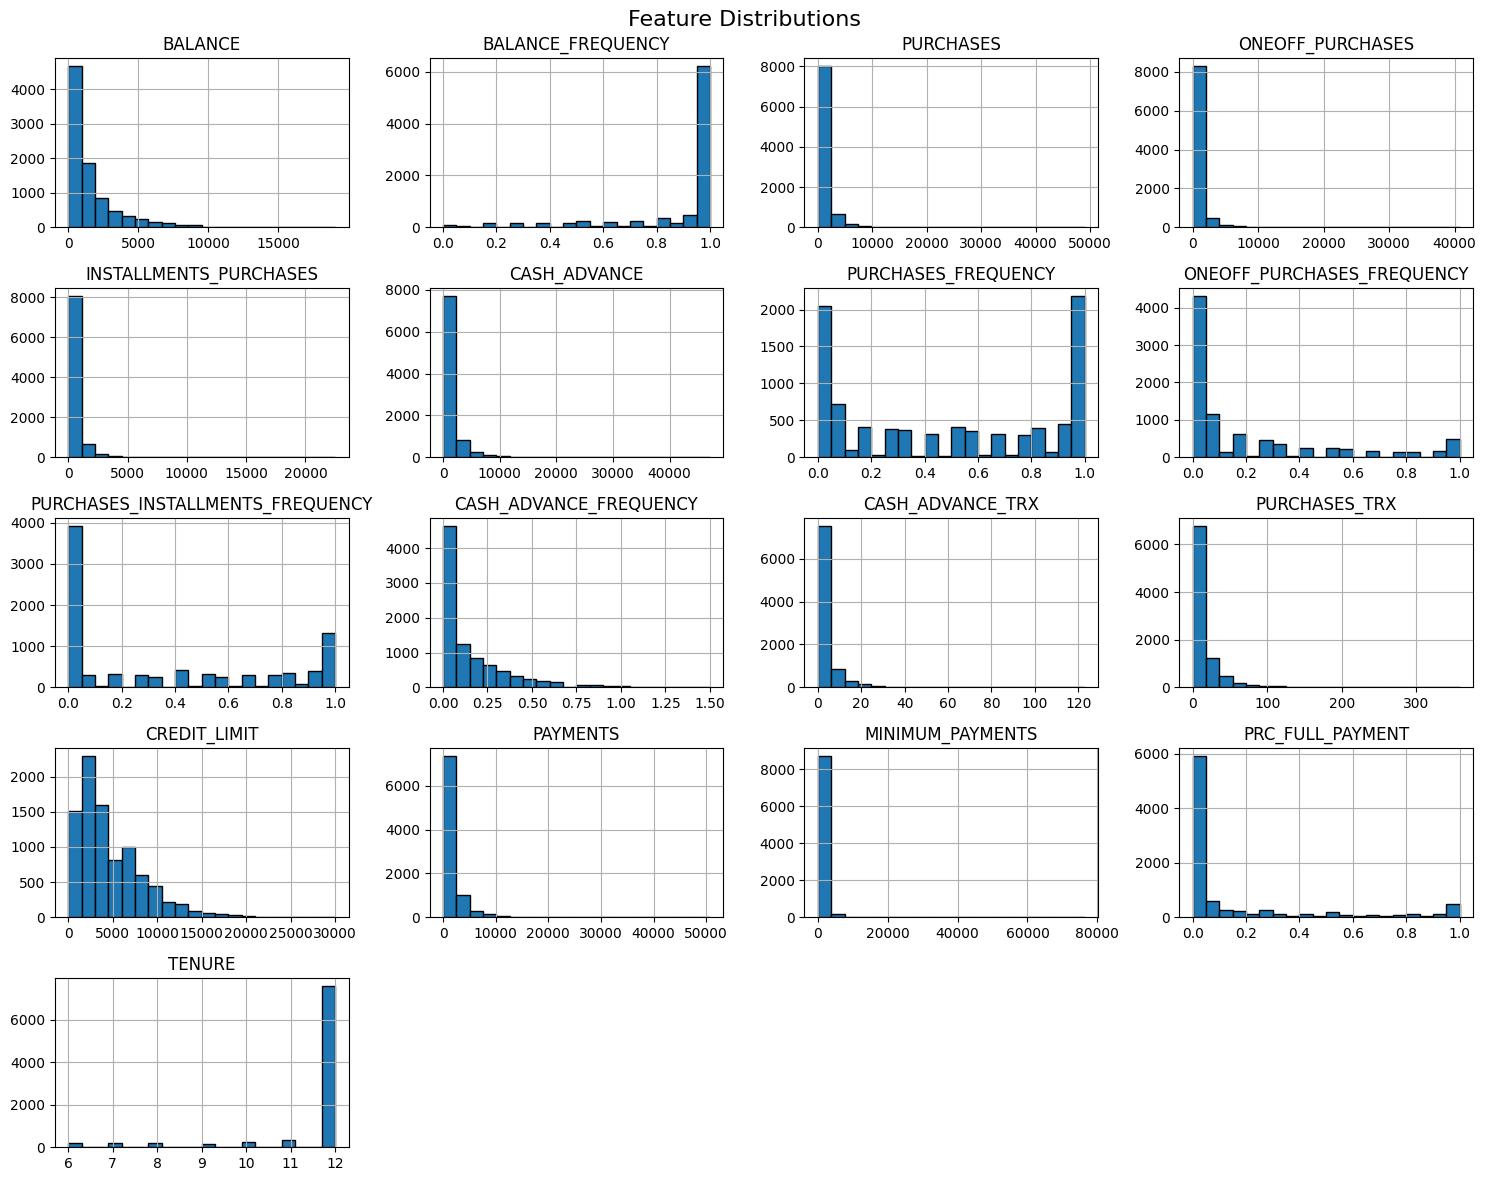

In [96]:
# Plot histograms for each feature
df.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()


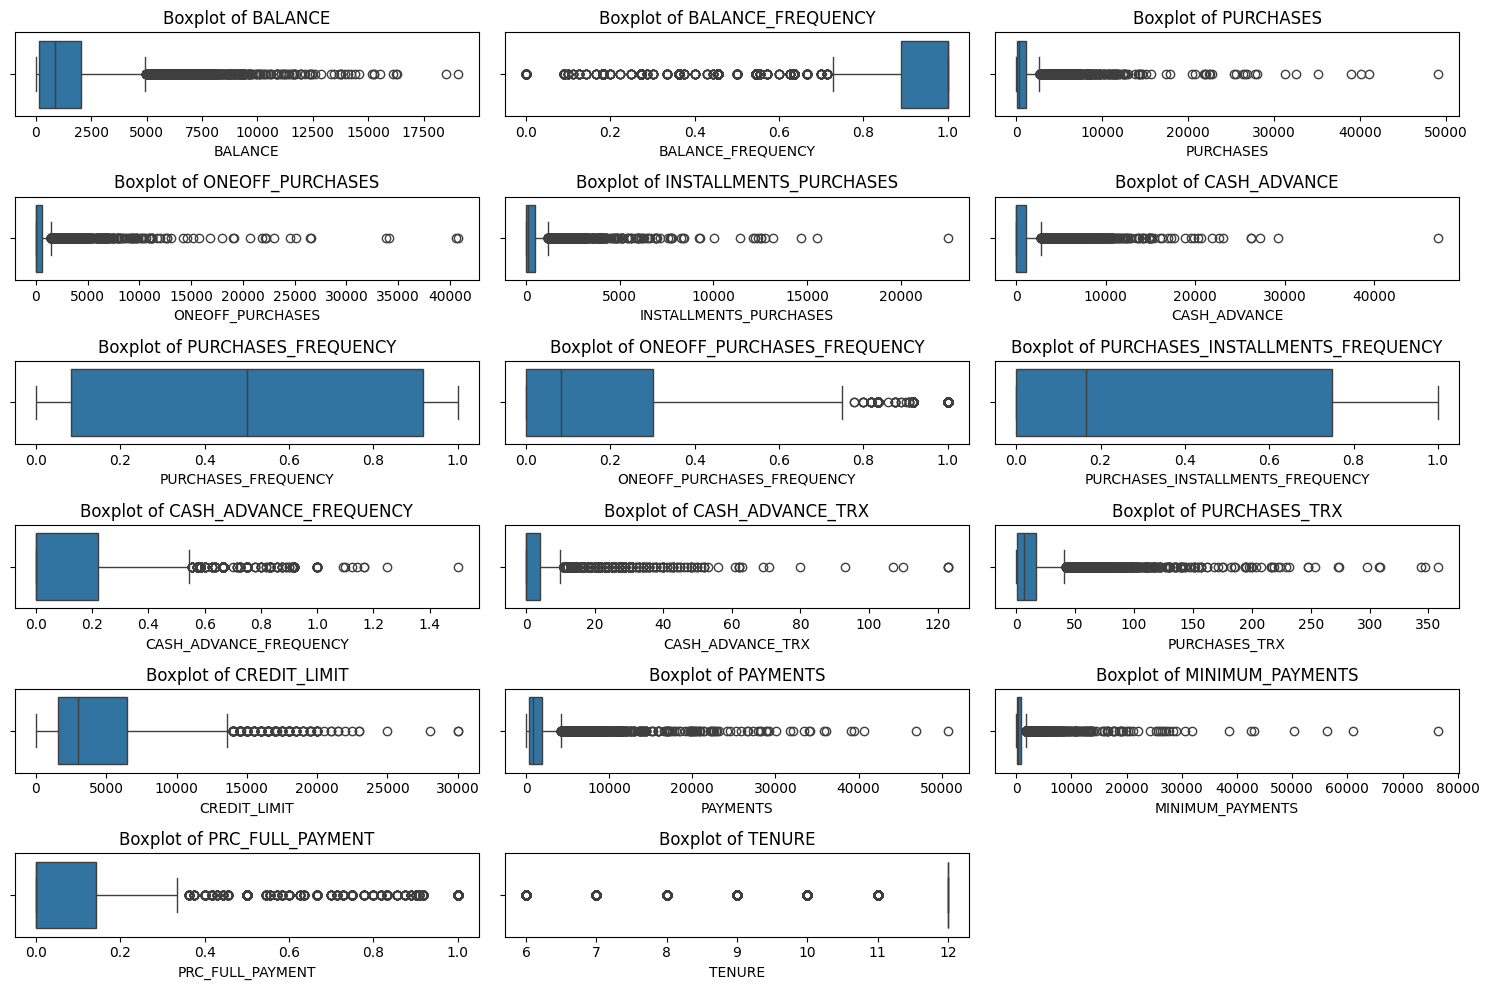

In [98]:
# Boxplots for all numerical features
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
  plt.subplot((len(numeric_columns) + 2) // 3, 3, i + 1)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Outliers are detected using the Tukey method, which defines an interquartile range (IQR) and considers values outside 1.5 times the IQR as outliers. Based on the plots, there does appear indeed to be quite a few outliers in the dataset. We do not remove them, as they may be valuable for clustering.

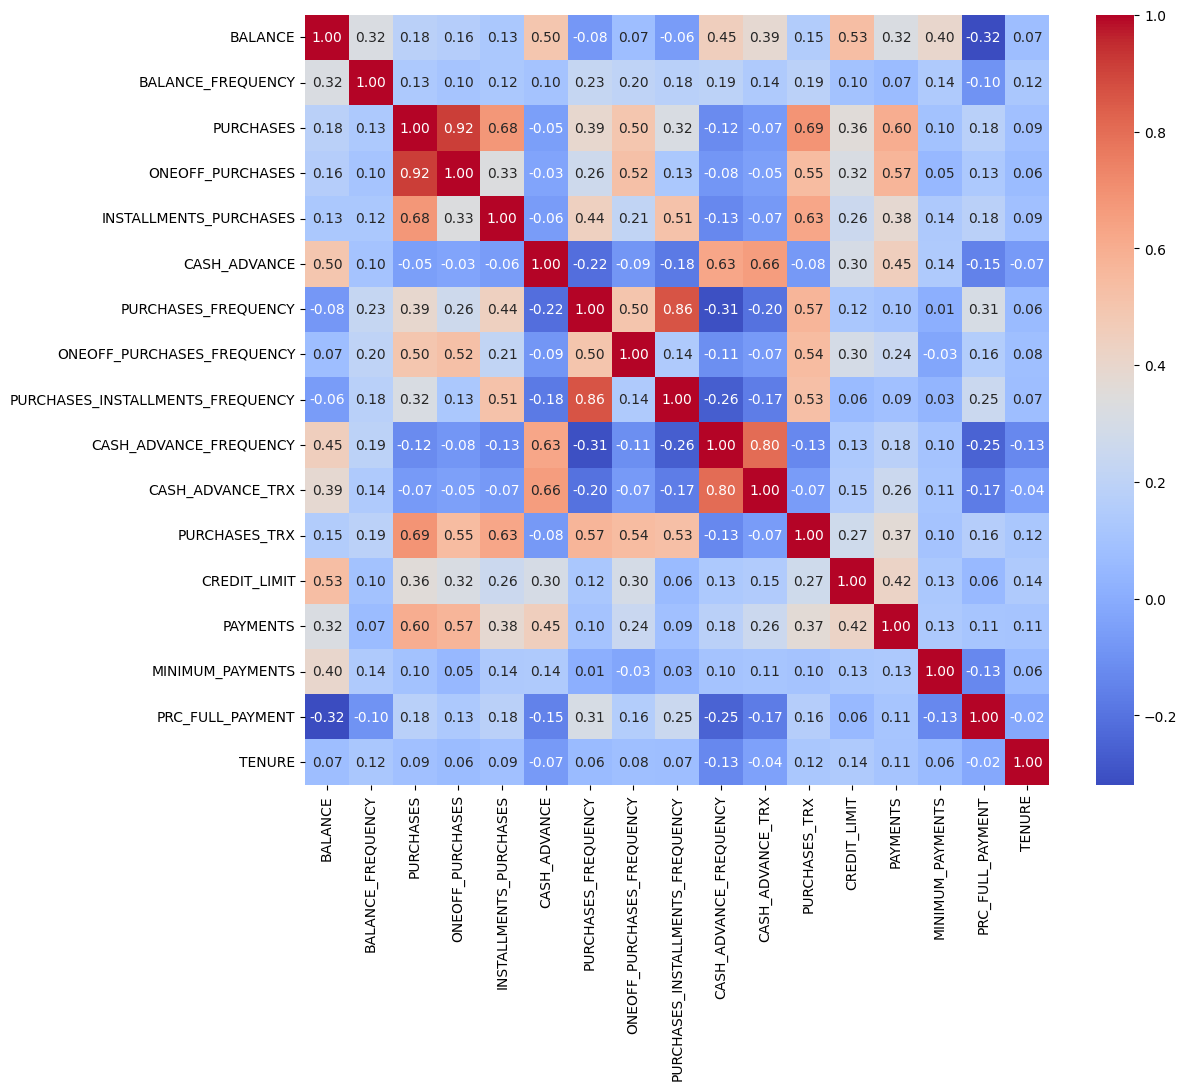

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Draw a correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


Highest 10 correlations:
ONEOFF_PURCHASES                  PURCHASES                           0.916845
PURCHASES                         ONEOFF_PURCHASES                    0.916845
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY                 0.862934
PURCHASES_FREQUENCY               PURCHASES_INSTALLMENTS_FREQUENCY    0.862934
CASH_ADVANCE_FREQUENCY            CASH_ADVANCE_TRX                    0.799561
CASH_ADVANCE_TRX                  CASH_ADVANCE_FREQUENCY              0.799561
PURCHASES                         PURCHASES_TRX                       0.689561
PURCHASES_TRX                     PURCHASES                           0.689561
INSTALLMENTS_PURCHASES            PURCHASES                           0.679896
PURCHASES                         INSTALLMENTS_PURCHASES              0.679896
dtype: float64


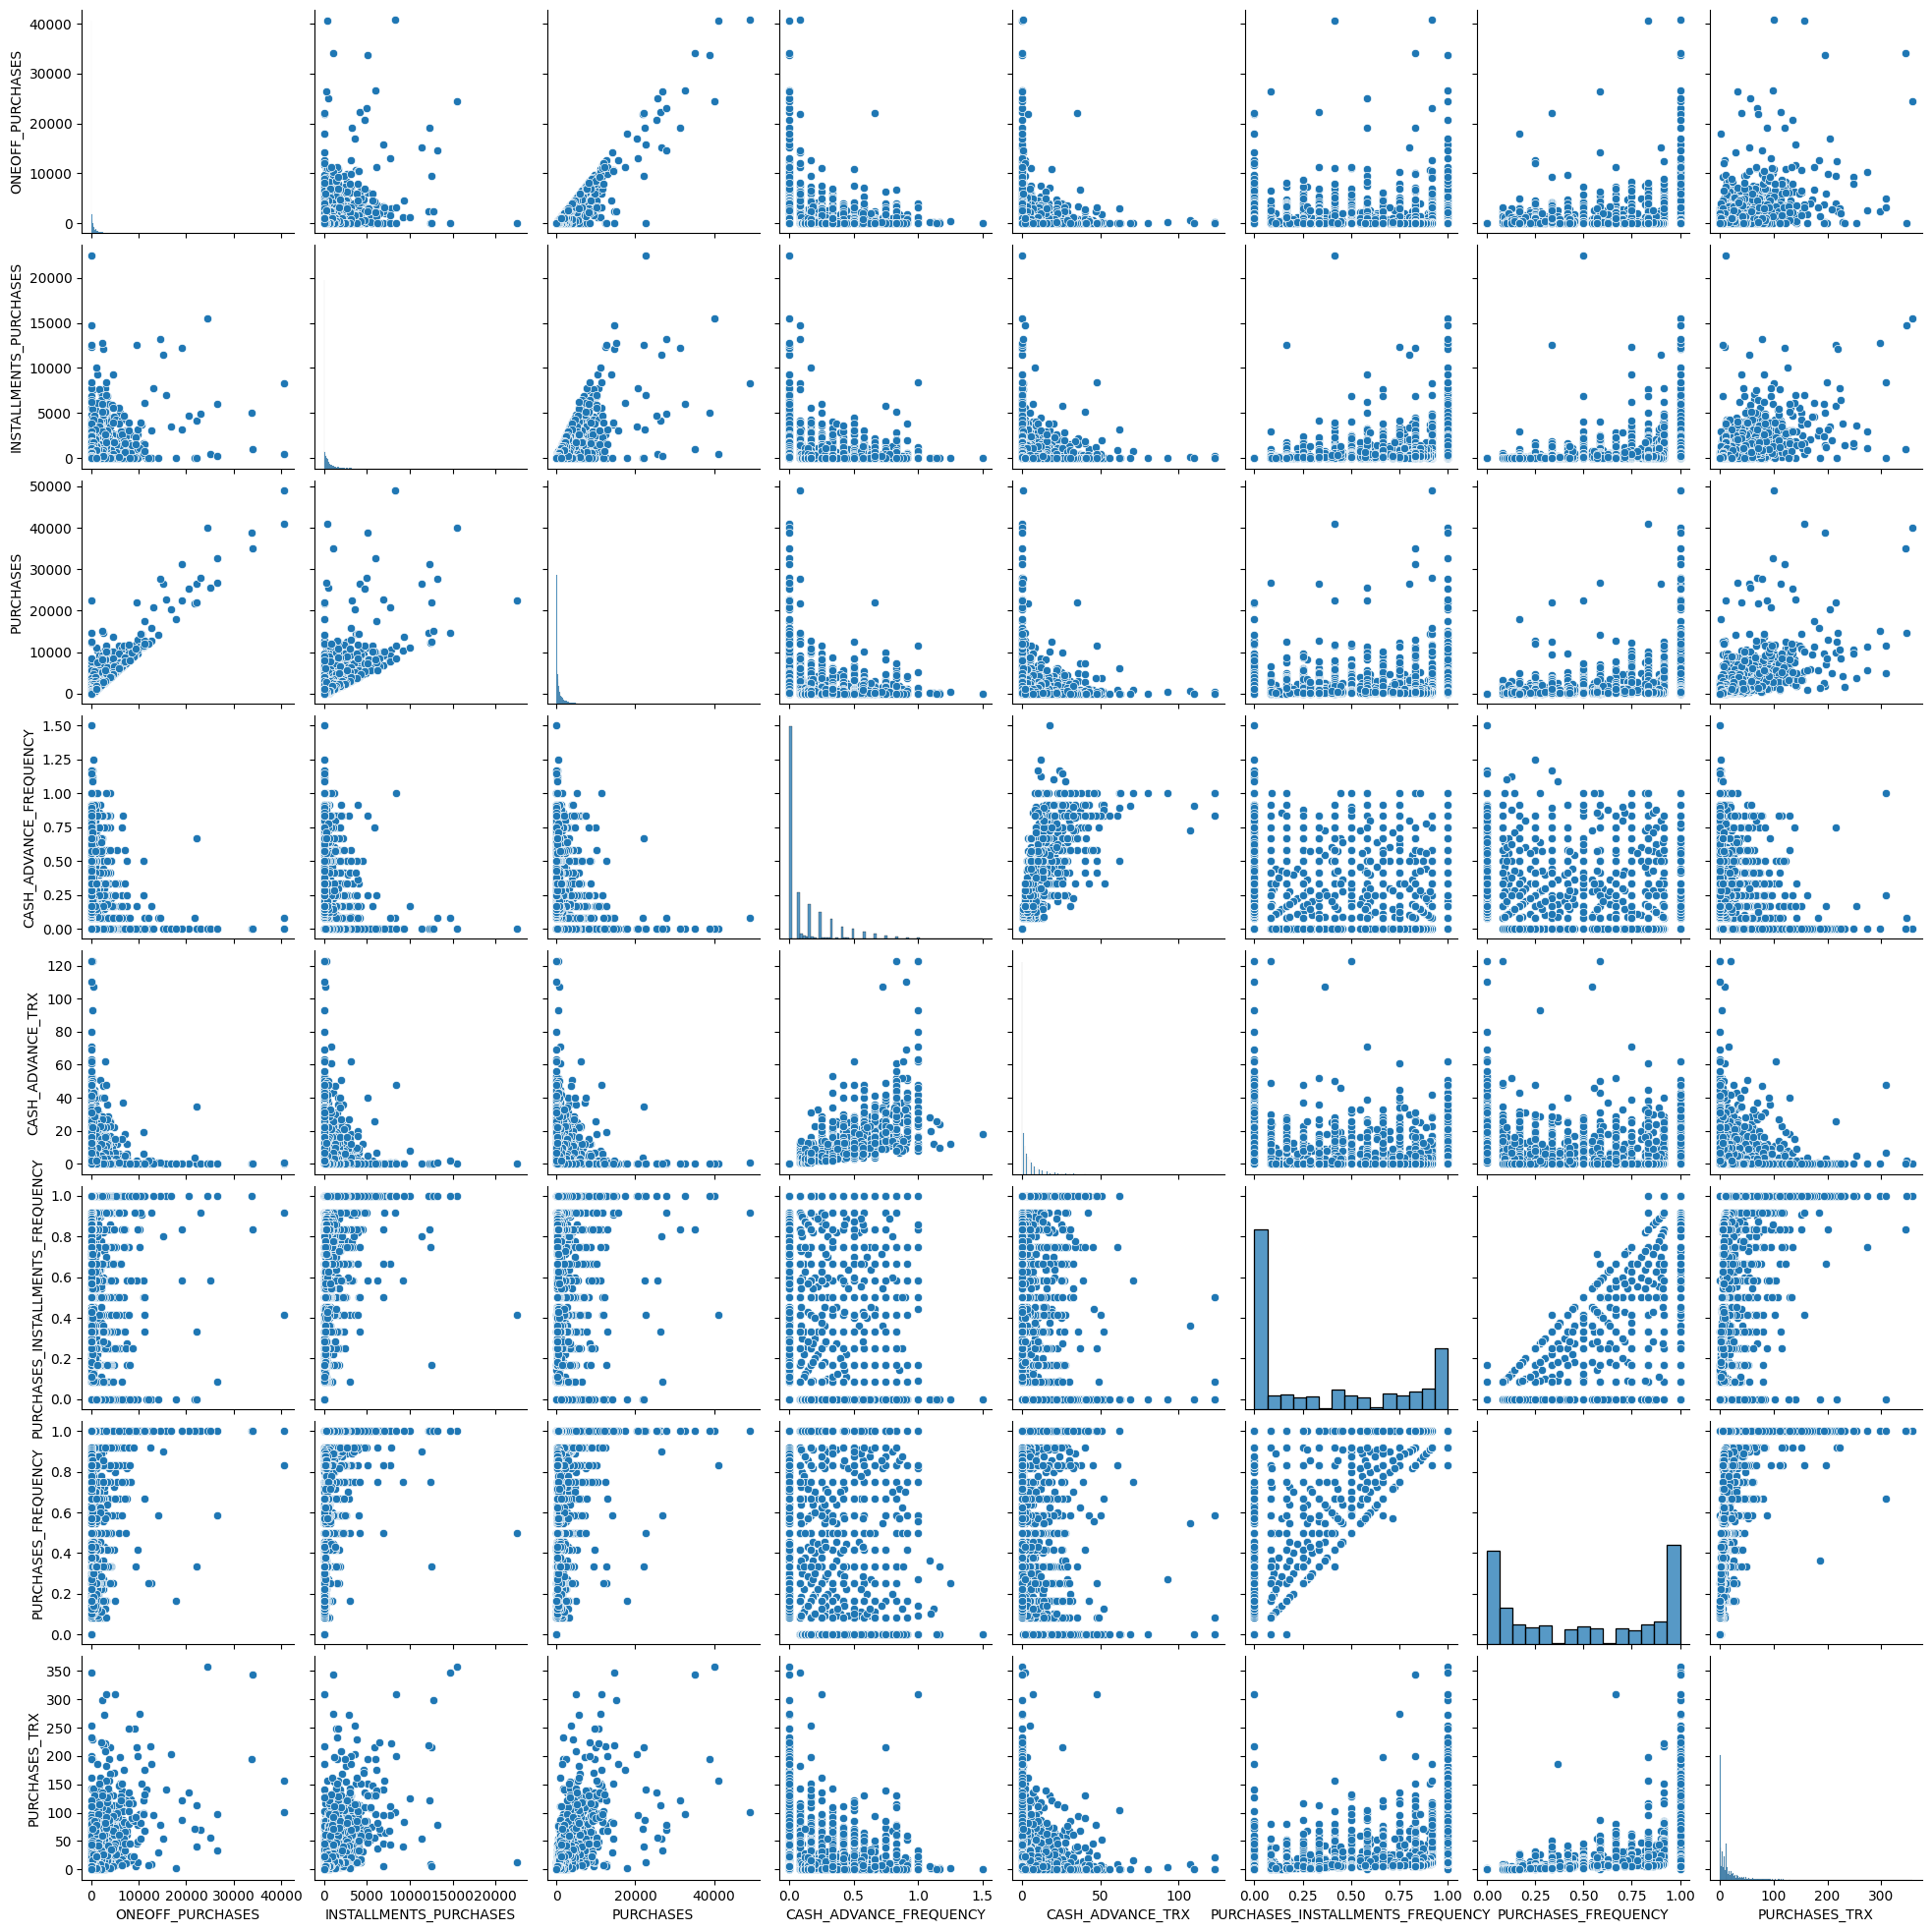

In [101]:
# Get the absolute values of the correlation matrix
abs_corr_matrix = correlation_matrix.abs()

# Mask the diagonal values to avoid self-correlation
np.fill_diagonal(abs_corr_matrix.values, 0)

# Find the highest 5 correlations
highest_corrs = abs_corr_matrix.unstack().sort_values(ascending=False).head(10)
print("Highest 10 correlations:")
print(highest_corrs)

# Extract the unique feature pairs
feature_pairs = set([item for sublist in highest_corrs.index.tolist() for item in sublist])

# Create a pairplot for the highest correlated features
sns.pairplot(df, vars=list(feature_pairs))
plt.show()

There is evidence of correlation between most features (and very strong correlation between some features), therefore it is necessary to do dimensionality reduction. I will use PCA to reduce the number of features. Before doing that, I will normalize the data.

In [66]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

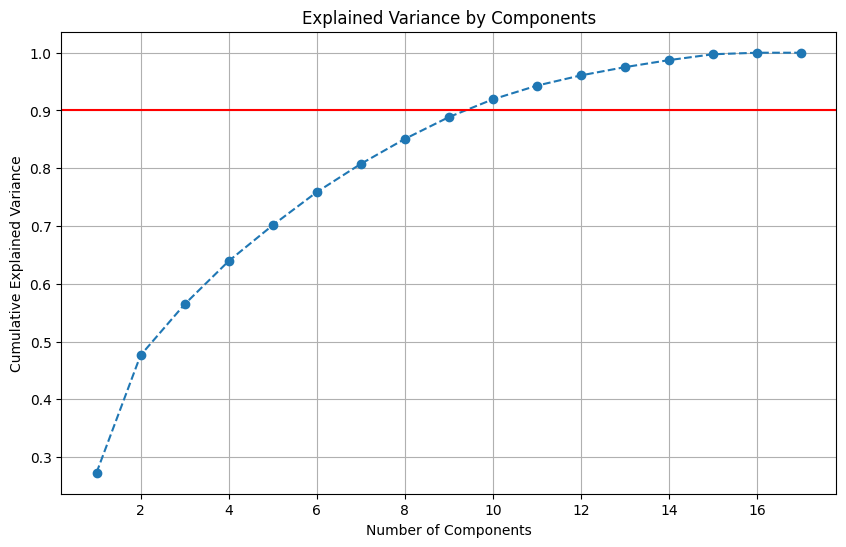

Minimum number of components to explain 90% variance: 10


In [67]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA on the normalized data
pca.fit(df_normalized)

# Calculate cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Find the minimum number of components that explain at least 90% of the variance
optimal_k = next(i for i, total in enumerate(cumulative_variance) if total >= 0.90) + 1

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

print(f"Minimum number of components to explain 90% variance: {optimal_k}")

In [68]:
pca_optimal = PCA(n_components=optimal_k)
df_pca = pd.DataFrame(pca_optimal.fit_transform(df_normalized))

                                       PC1       PC2       PC3
BALANCE                           0.102098  0.403730  0.162348
BALANCE_FREQUENCY                 0.120759  0.131825  0.424421
PURCHASES                         0.411510  0.039455 -0.257277
ONEOFF_PURCHASES                  0.346287  0.061385 -0.390220
INSTALLMENTS_PURCHASES            0.336724 -0.019544  0.108488
CASH_ADVANCE                     -0.022512  0.438917  0.020833
PURCHASES_FREQUENCY               0.321087 -0.191351  0.369574
ONEOFF_PURCHASES_FREQUENCY        0.294413 -0.018908 -0.115720
PURCHASES_INSTALLMENTS_FREQUENCY  0.274373 -0.179021  0.467404
CASH_ADVANCE_FREQUENCY           -0.088270  0.434157  0.102362
CASH_ADVANCE_TRX                 -0.047844  0.419608  0.107530
PURCHASES_TRX                     0.390539 -0.020605  0.075094
CREDIT_LIMIT                      0.212082  0.237668 -0.100675
PAYMENTS                          0.266608  0.256297 -0.277955
MINIMUM_PAYMENTS                  0.064864  0.170117  0

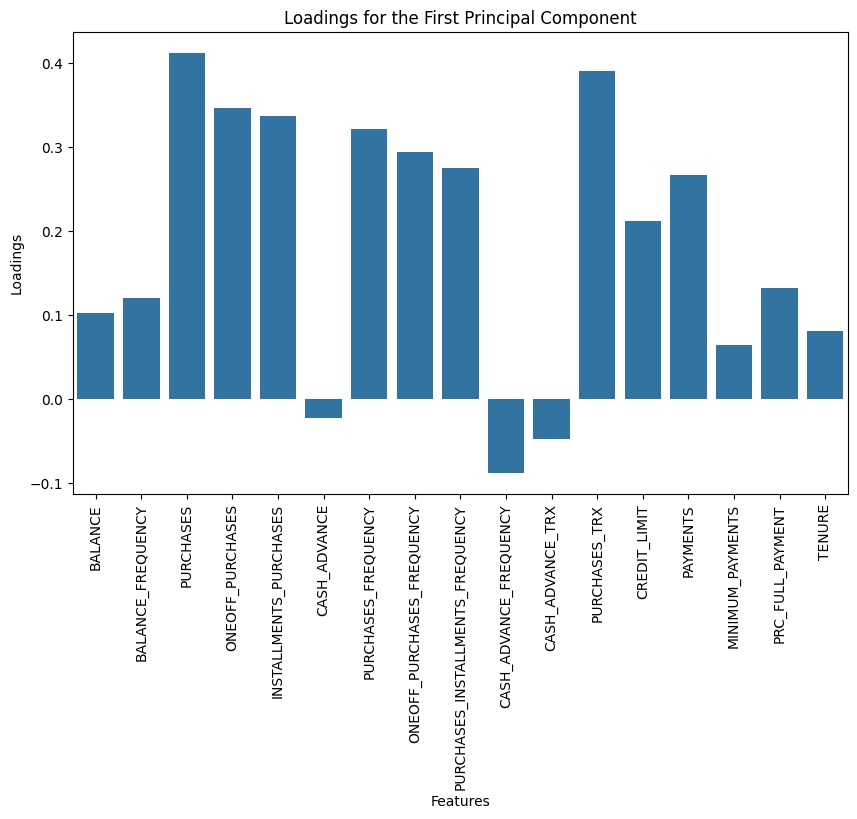

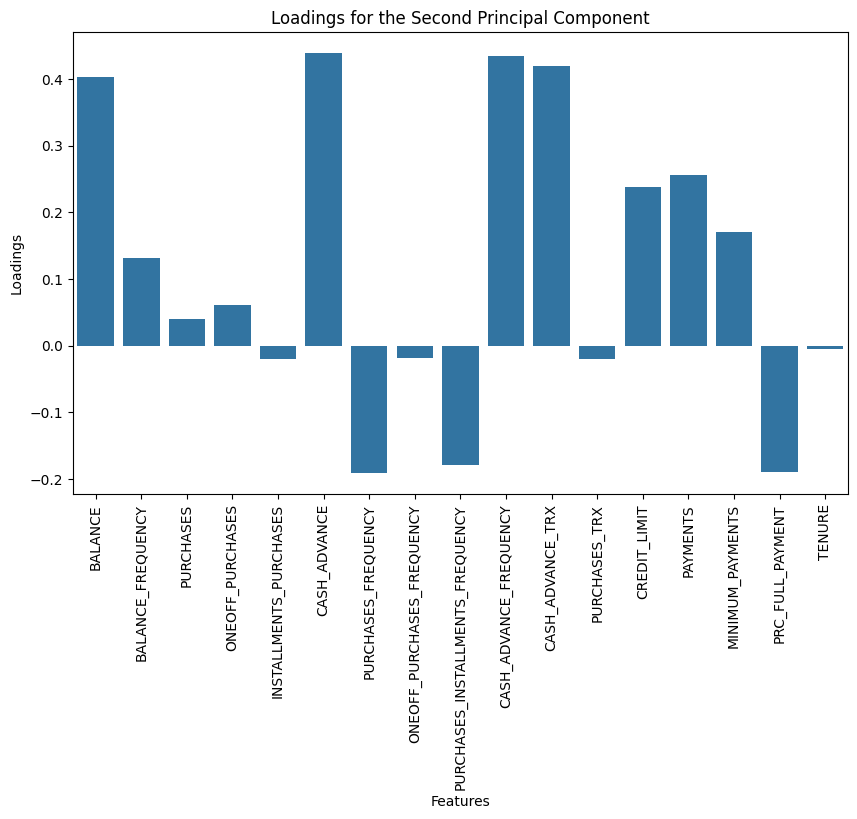

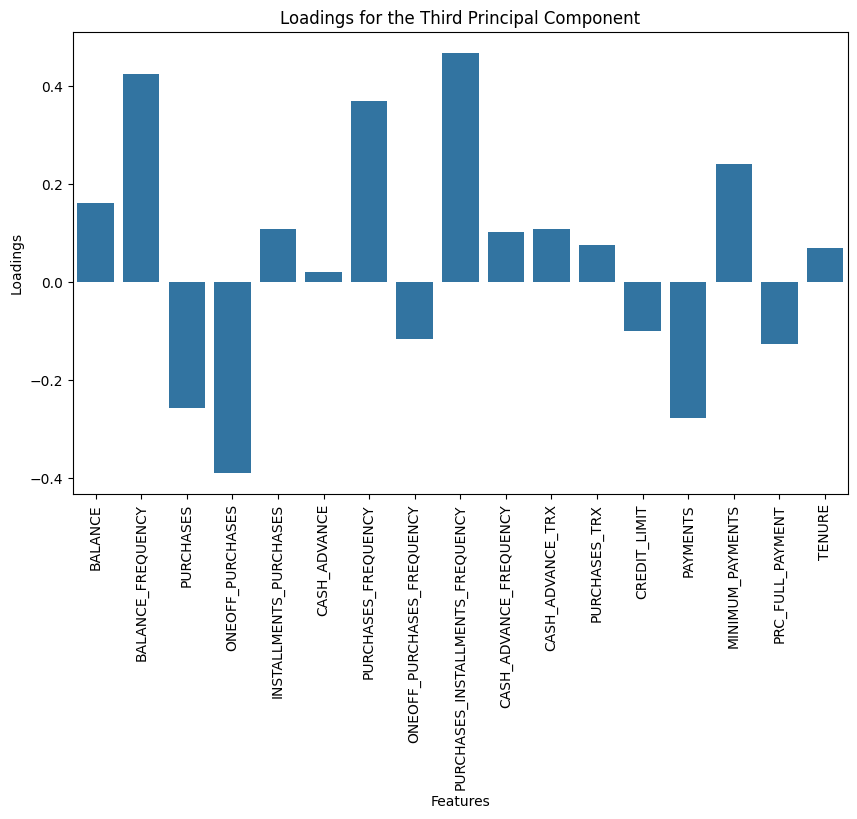

In [69]:
# Get the loadings (components)
loadings = pca_optimal.components_

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(optimal_k)], index=df.columns)

# Print the first 3 principal components
print(loadings_df.iloc[:, :3])

# Plot the loadings for the first principal component
plt.figure(figsize=(10, 6))
sns.barplot(x=loadings_df.index, y=loadings_df['PC1'])
plt.title('Loadings for the First Principal Component')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.xticks(rotation=90)
plt.show()

# Plot the loadings for the second principal component
plt.figure(figsize=(10, 6))
sns.barplot(x=loadings_df.index, y=loadings_df['PC2'])
plt.title('Loadings for the Second Principal Component')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.xticks(rotation=90)
plt.show()

# Plot the loadings for the third principal component
plt.figure(figsize=(10, 6))
sns.barplot(x=loadings_df.index, y=loadings_df['PC3'])
plt.title('Loadings for the Third Principal Component')
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.xticks(rotation=90)
plt.show()

The first component focuses most on purchase data, as evidenced by high loadings for the `PURCHASES`, `ONEOFF_PURCHASES`, and `PURCHASES_TRX` columns. The second component focuses most on balance/cash data, as evidenced by the `BALANCE`, `CASH_ADVANCE_FREQUENCY`, `CASH_ADVANCE_TRX` and `CASH` columns.

### Feature Importance Hypotheses
Based on domain knowledge, the following features are hypothesized to be key for clustering:
- **PURCHASES**: Indicates spending behavior and is a primary factor in segmentation.
- **BALANCE**: Reflects financial standing and credit utilization.
- **CREDIT_LIMIT**: Impacts spending capacity.
- **MINIMUM_PAYMENTS**: Could signify payment discipline and risk levels.
- **CASH_ADVANCE**: Suggests cash reliance, potentially indicating financial stress.


KMeans Silhouette Score: 0.202


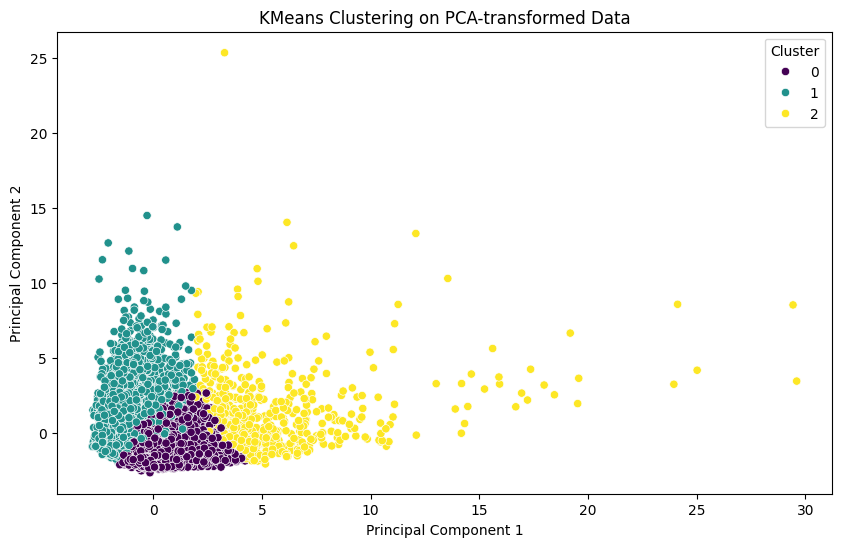

DBSCAN Silhouette Score: -0.491


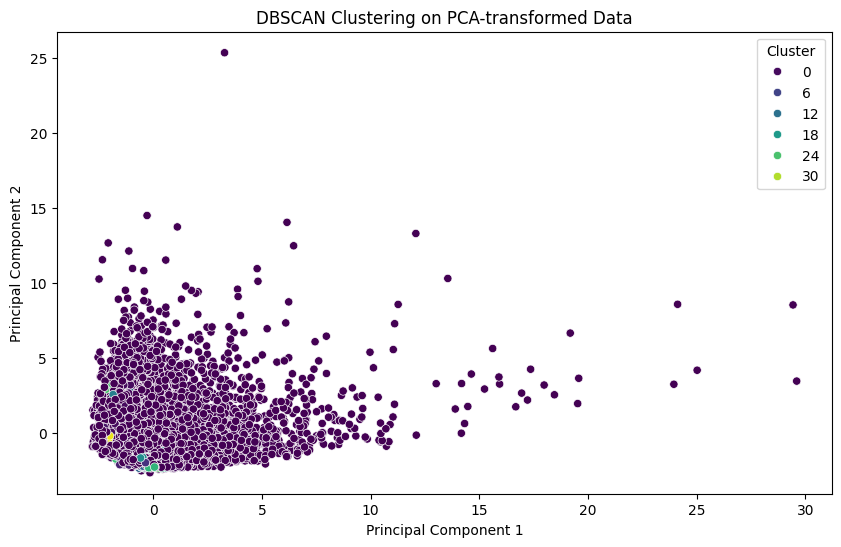

Agglomerative Silhouette Score: 0.182


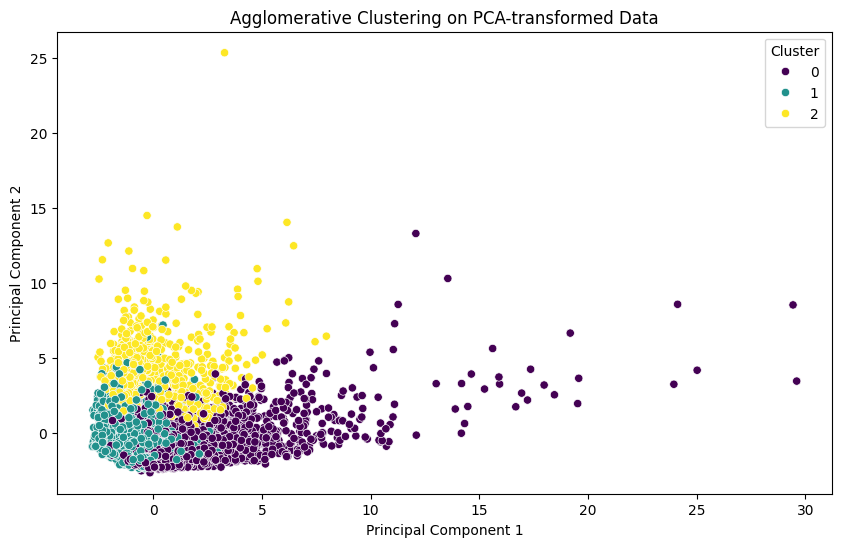

Spectral Clustering Silhouette Score: 0.176


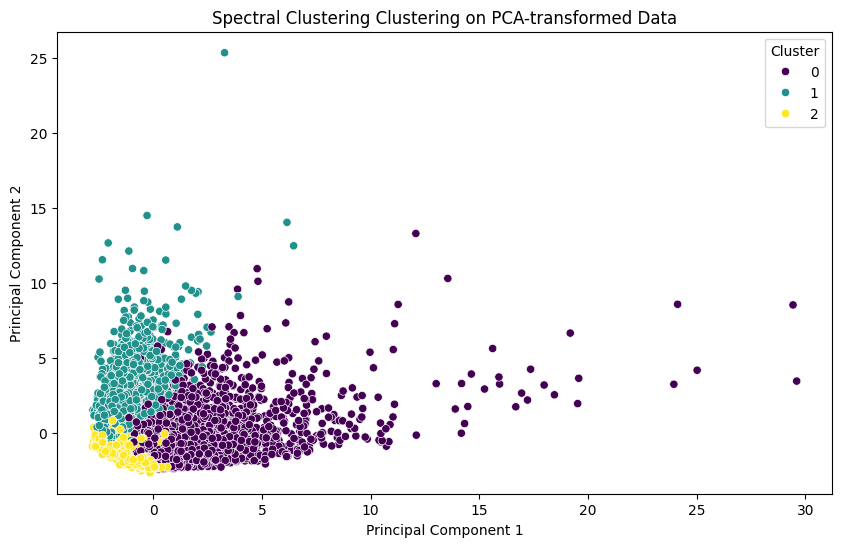

Gaussian Mixture Silhouette Score: 0.089


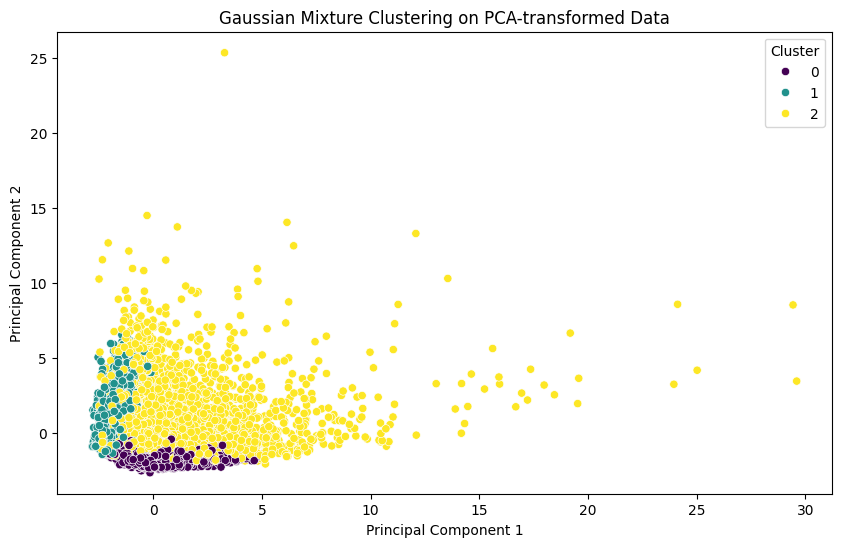

In [70]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# List of clustering algorithms to evaluate
clustering_algorithms = [
    {"name": "KMeans", "model": KMeans(n_clusters=3, random_state=42)},  # Example with 3 clusters
    {"name": "DBSCAN", "model": DBSCAN(eps=0.5, min_samples=5)},
    {"name": "Agglomerative", "model": AgglomerativeClustering(n_clusters=3)},
    {"name": "Spectral Clustering", "model": SpectralClustering(n_clusters=3, random_state=42, affinity='nearest_neighbors')},
    {"name": "Gaussian Mixture", "model": GaussianMixture(n_components=3, random_state=42)}
]

# Loop through clustering algorithms
for algo in clustering_algorithms:
    # Fit the clustering model
    model = algo["model"]
    
    if algo["name"] == "Gaussian Mixture":
        labels = model.fit_predict(df_pca)  # For GMM, use fit_predict
    else:
        model.fit(df_pca)
        labels = model.labels_ if hasattr(model, 'labels_') else model.predict(df_pca)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_pca, labels)
    print(f"{algo['name']} Silhouette Score: {silhouette_avg:.3f}")
    
    # Plot the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=labels, palette='viridis')
    plt.title(f'{algo["name"]} Clustering on PCA-transformed Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster', loc='upper right')
    plt.show()


The three clusters identified across most clustering methods are broadly similar (except for DBSCAN). These clusters roughly correspond to:
- Low PC1, low PC2: little purchases and little balance/cash, meaning low economic activity
- Rather low/med PC1, med/high PC2: not a lot of purchases, but a fair amount of balance/cash
- High PC1, med/high PC2: a lot of purchases and a fair amount of balance/cash

W (Basis matrix):
   Component_1  Component_2  Component_3  Component_4  Component_5
0     0.071806     0.000000     0.006941     0.021148     0.061648
1     0.293398     0.247345     0.000000     1.555302     0.399224
2     0.470587     0.132776     0.061693     0.000000     0.280421
3     0.498007     0.091340     0.090857     0.000000     0.000000
4     0.060114     0.041079     0.015934     0.067225     0.117094

H (Coefficient matrix):
                  BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
Component_1    267.273880           1.334449    262.592939           0.00000   
Component_2  14350.883449           1.483068      0.000000           0.00000   
Component_3   1323.126185           0.199360  10430.870537        7633.61339   
Component_4      0.000000           0.060987      0.000000           0.00000   
Component_5    328.958851           0.100420     41.243415           0.00000   

             INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \


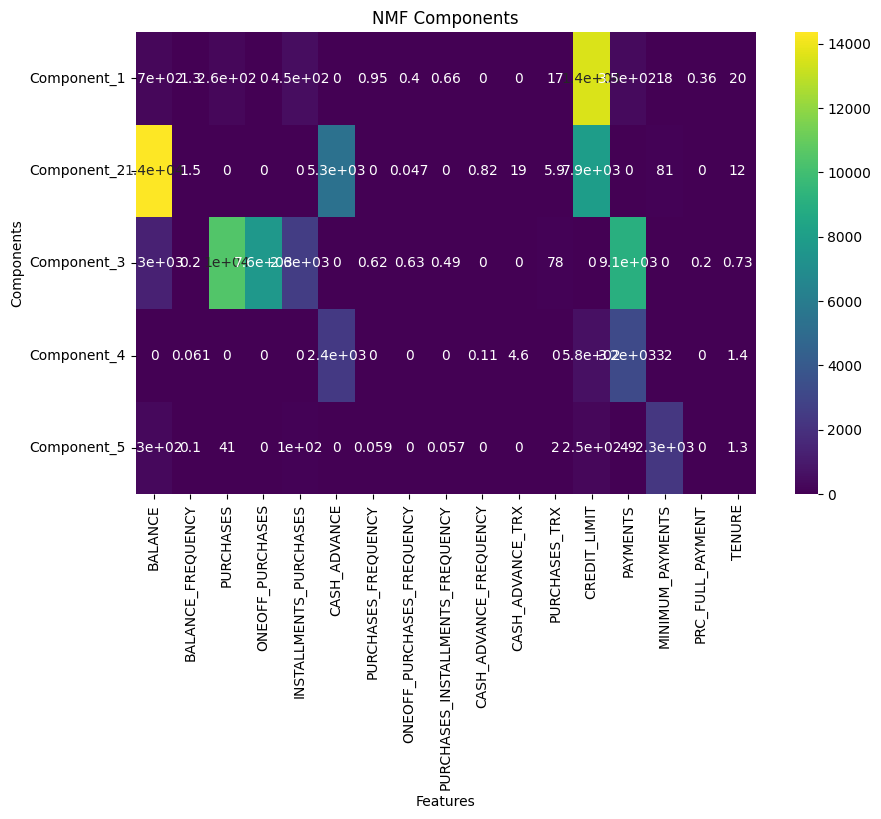

In [88]:
from sklearn.decomposition import NMF

# Initialize NMF
nmf = NMF(n_components=5, random_state=42)

# Fit and transform the data
W = nmf.fit_transform(df)
H = nmf.components_

# Create DataFrames for the results
W_df = pd.DataFrame(W, columns=[f'Component_{i+1}' for i in range(5)])
H_df = pd.DataFrame(H, columns=df.columns, index=[f'Component_{i+1}' for i in range(5)])

# Print the first few rows of W and H
print("W (Basis matrix):")
print(W_df.head())

print("\nH (Coefficient matrix):")
print(H_df)

# Plot the components
plt.figure(figsize=(10, 6))
sns.heatmap(H_df, annot=True, cmap='viridis')
plt.title('NMF Components')
plt.xlabel('Features')
plt.ylabel('Components')
plt.show()

As seen on the heatmap above, the main components have mainly picked up on the `CREDIT_LIMIT` (component 1), `BALANCE` (component 2), `PURCHASES`/`ONEOFF_PURCHASES`/`INSTALLMENTS_PURCHASES`/`PAYMENTS` (component 3), `PAYMENTS` (component 4), and `MINIMUM_PAYMENTS` (component 5) columns.

In [94]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

clusters = np.argmax(W, axis=1)

import plotly.express as px
import pandas as pd

# Create a DataFrame for visualization
data = pd.DataFrame({
    'Component 1': df_pca[0],
    'Component 2': df_pca[1],
    'Component 3': df_pca[2],
    'Cluster': clusters
})

# Create a 3D scatter plot
fig = px.scatter_3d(data, x='Component 1', y='Component 2', z='Component 3',
                    color='Cluster', color_continuous_scale='Viridis',
                    title='3D Plot of Clusters')
fig.update_traces(marker=dict(size=3))
fig.show()


In [95]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_pca, clusters)
print(f"Silhouette Score for NMF: {silhouette_avg:.3f}")

Silhouette Score for NMF: 0.020


# Performance Analysis of Clustering Techniques and NMF

## Summary Table of Clustering Performance

Below is a summary table of the performance metrics (Silhouette Scores) for each clustering algorithm and NMF:

| **Clustering Technique**   | **Silhouette Score** | **Key Observations**                                                                                      |
|-----------------------------|----------------------|----------------------------------------------------------------------------------------------------------|
| **KMeans**                 | 0.202               | Performed best among all techniques, identifying distinct clusters with reasonable separation.           |
| **DBSCAN**                 | -0.491              | Struggled significantly due to high dimensionality and varying density; negative score indicates poor clustering. |
| **Agglomerative Clustering**| 0.182               | Performed similarly to KMeans but slightly worse; useful for hierarchical relationships.                 |
| **Gaussian Mixture Models**| 0.089               | Struggled to form well-separated clusters; soft clustering approach may not align with dataset structure. |
| **Spectral Clustering**    | 0.176               | Performed similarly to Agglomerative Clustering; sensitive to parameter tuning.                          |
| **NMF**                    | 0.020               | Identified latent components but showed poor clustering performance due to overlapping group structures.  |

---

## Clustering Techniques

### 1. **KMeans**
- **Strengths**:
  - Achieved a **Silhouette Score** of 0.202, the highest among all clustering techniques.
  - Consistently identified three distinct groups:
    - Low economic activity (low `PURCHASES` and `BALANCE`).
    - Medium activity (moderate `PURCHASES` and `BALANCE`).
    - High activity (high `PURCHASES` and `BALANCE`).
  - Computationally efficient and easy to interpret.
- **Limitations**:
  - Assumes spherical clusters, which may oversimplify real-world groupings.
  - Sensitive to outliers and initialization.

### 2. **DBSCAN**
- **Strengths**:
  - Identified non-spherical clusters and isolated noise points effectively.
  - Does not require a predefined number of clusters.
- **Limitations**:
  - Achieved a **negative Silhouette Score (-0.491)**, indicating poor clustering due to high dimensionality and varying density.
  - Required fine-tuning of `eps` and `min_samples`, which was non-trivial for this dataset.

### 3. **Agglomerative Clustering**
- **Strengths**:
  - Captured hierarchical relationships between clusters.
  - Produced similar groupings to KMeans with three clusters.
- **Limitations**:
  - Slightly lower Silhouette Score (0.182) compared to KMeans.
  - Computationally expensive for larger datasets.

### 4. **Gaussian Mixture Models (GMM)**
- **Strengths**:
  - Captured overlapping clusters by modeling soft probabilities, offering flexibility.
  - Provided intuitive cluster assignments based on probability thresholds.
- **Limitations**:
  - Achieved a **Silhouette Score** of 0.089, indicating poorly separated clusters.
  - Computationally expensive and sensitive to initialization.

### 5. **Spectral Clustering**
- **Strengths**:
  - Effective for non-linear clusters.
  - Leveraged nearest neighbor affinity, which aligned well with PCA-transformed data.
- **Limitations**:
  - Slightly lower Silhouette Score (0.176) compared to KMeans and Agglomerative Clustering.
  - Computationally intensive due to eigenvalue decomposition.

---

## Non-Negative Matrix Factorization (NMF)
- **Silhouette Score**: 0.020
- **Strengths**:
  - Decomposed the data into interpretable latent features, revealing key components:
    - **Component 1**: Strongly linked to `CREDIT_LIMIT`.
    - **Component 2**: Dominated by `BALANCE`.
    - **Component 3**: Represented purchasing behaviors (`PURCHASES`, `ONEOFF_PURCHASES`).
  - Highlighted key feature groups and their importance in segmenting customer behavior.
  - Added explainability compared to clustering algorithms.
- **Limitations**:
  - Poor clustering performance with overlapping group structures, as indicated by the low Silhouette Score (0.020).
  - Sensitive to initial values, requiring multiple runs for stability.
  - Provided soft assignments but no explicit clusters, necessitating further analysis (e.g., clustering on NMF-transformed data).

---

## Synthesis and Overall Insights

### Dimensionality Reduction (PCA):
- PCA was instrumental in reducing dimensionality while retaining 90% of the variance.
- Simplified clustering by focusing on three key principal components:
  - **PC1**: Captured purchasing behaviors (`PURCHASES`, `PURCHASES_TRX`).
  - **PC2**: Represented balance and cash advance metrics (`BALANCE`, `CASH_ADVANCE`).
  - **PC3**: Highlighted payment-related features (`MINIMUM_PAYMENTS`).

### Clustering Models:
- **Best Performer**: KMeans, with a Silhouette Score of 0.202, offered the best balance of interpretability, computational efficiency, and clustering quality.
- **DBSCAN**: Poor performance due to the dataset's characteristics.
- **Agglomerative Clustering**: Similar to KMeans but slightly lower performance.
- **Gaussian Mixture Models**: Struggled to form distinct clusters, as evidenced by the low score.
- **Spectral Clustering**: Moderate performance but computationally intensive.

### NMF:
- NMF provided an alternative perspective by identifying latent components instead of strict clusters.
- Its explainable decomposition complemented clustering methods by highlighting feature groups critical for segmentation.

---

## Conclusion and Recommendations

- **Best Technique**: KMeans is recommended for its strong performance, ease of implementation, and alignment with business needs for clear segmentation.
- **Complementary Methods**: NMF can be used alongside KMeans to interpret the underlying factors influencing customer segments.
- **Next Steps**:
  - Fine-tune DBSCAN and Spectral Clustering parameters to better handle high-dimensional data.
  - Explore ensemble clustering methods to combine the strengths of multiple techniques.
  - Incorporate additional customer features, such as demographics or behavioral data, to enhance segmentation accuracy.

In summary, unsupervised learning techniques successfully identified meaningful customer segments, enabling actionable insights for marketing strategies and resource optimization.